In [1]:
import datetime
from collections import Counter
import os
import sys
import os.path, time
import glob
import re
import matplotlib.pyplot as plt

## File Checking

In [2]:
pwd

'/home/matt/Documents/Projects/NYC511_CameraScrape'

In [9]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%aimport tt

In [20]:
df = tt.image_scrape_summary(auto_overwrite=True)
df.head()

921 ['images/Jackson_Ave_at_Thomson_Ave', 'images/Br_Br-20_S_Rdwy_FDR_Dr', 'images/C3-MLK-02-NB_at_Forest_Ave-Ex11'] ['images/BQE_E_B_at_Pearl_St', 'images/FDR_Dr_at_23_St', 'images/Park_Ave_at_96_St']
Total Files: 49,047
Images scraped today: 530
Images scraped in the last week: 5,380
Additional files since last snapshot: 170
Total Size On Disk: 1.71 gb
Number of cameras with data today: 106 of 921 (12.00%)
Last file: NYC_511_ImageScrape_File_Summary_as_of_11-20-2023.csv
Overwriting file. Saving to: NYC_511_ImageScrape_File_Summary_as_of_11-20-2023.csv


,min,max,count,nimages_today,nimages_last_week,total_size_in_bytes,November 2023,September 2023,July 2023
Long_Island_Expy_at_Douglaston_Pkwy,2023-09-12 17:49:19,2023-11-20 20:10:19,60,5,15,992485,55,5,NaN
LIE_at_Marathon_Pkwy,2023-09-12 17:48:29,2023-11-20 20:10:19,60,5,15,1024869,55,5,NaN
Lily_Pond_Ave_at_School_Rd,2023-09-12 17:49:19,2023-11-20 20:10:19,60,5,15,740296,55,5,NaN
Linden_Blvd_at_Pennsylvania_Av,2023-09-12 17:49:19,2023-11-20 20:10:19,60,5,15,1052399,55,5,NaN
LIE_at_Kissena_Blvd,2023-09-12 17:48:29,2023-11-20 20:10:18,60,5,15,908356,55,5,NaN


In [21]:
last_image_scraped_time = df['max'].max()
print("Last Image Scraped: {}".format(last_image_scraped_time))

Last Image Scraped: 2023-11-20 20:10:19


In [22]:
now = datetime.datetime.now()
df['time_since_last_scrape'] = now - df['max']

for i in [1,5,15,60,60*4, 60*12]:
    tt.print_cam_summary_past_nminutes(i, df)

Number of cameras with data in past 1 minute: 0 of 906 (0.00%)
Number of cameras with data in past 5 minutes: 0 of 906 (0.00%)
Number of cameras with data in past 15 minutes: 106 of 906 (12.00%)
Number of cameras with data in past 1 hour: 477 of 906 (53.00%)
Number of cameras with data in past 4 hours: 904 of 906 (100.00%)
Number of cameras with data in past 12 hours: 920 of 906 (102.00%)


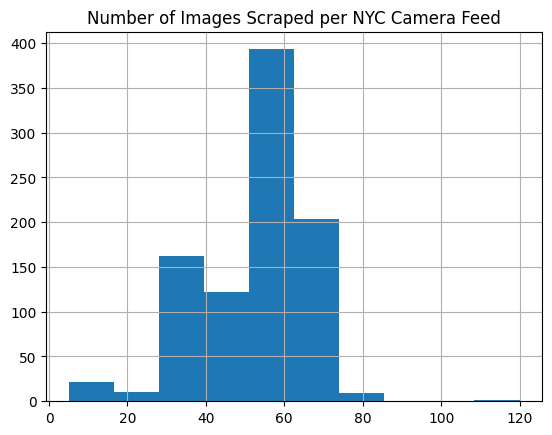

In [23]:
df['count'].hist()
plt.title("Number of Images Scraped per NYC Camera Feed");

## Test Saving An Image

In [ ]:
import urllib

In [ ]:
img_url = "https://webcams.nyctmc.org/api/cameras/eafc65f5-6ff9-4203-905f-3995b9fbc9eb/image?t=1693970292722"
img_filename = "sample_camera_output_urllib.jpg"
urllib.request.urlretrieve(img_url, img_filename)

In [ ]:
pwd

## Previewing Images

In [ ]:
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow, imread
import glob

In [ ]:
files = glob.glob("images/**/*.png")
print(len(files))
files[:10]

In [ ]:
imgs = []
for f in files[:10]:
    img = Image.open(f)#imread(f) #imread will read in as NumPy array instead...
    imgs.append(img)
print(len(imgs))
imshow(imgs[0])

## Dev Area

In [153]:
start = datetime.datetime.now()

exfilename = "NYC_511_ImageScrape_File_Summary_as_of_{}.csv".format(now.strftime("%m-%d-%Y"))
previous_snapshots = glob.glob("NYC_511_ImageScrape_File_Summary_as_of_*.csv")

def extract_filetime(filename):
    try:
        date_str = re.findall(".*?(\d){2}-(\d){2}-(\d){4}\.csv",x)[0]
        return pd.to_datetime(date_str)
    except:
        return None
    
previous_snapshots = sorted(previous_snapshots, key=lambda x: extract_filetime(x))
last_file = previous_snapshots[-1]
print("Last file: {}".format(last_file))

end = datetime.datetime.now()
elapsed = end - start
print("Process took: {}".format(elapsed))

previous_total = pd.read_csv(last_file, usecols=['count']).sum()


Last file: NYC_511_ImageScrape_File_Summary_as_of_11-04-2023.csv
Process took: 0:00:00.000802


In [155]:
%%timeit
start = datetime.datetime.now()
end = datetime.datetime.now()
elapsed = end - start
# print("Process took: {}".format(elapsed))

601 ns ± 13 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [148]:
%%timeit
reload = pd.read_csv(last_file, usecols=['count'])

883 µs ± 6.81 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [156]:
%%timeit
pd.read_csv(last_file, usecols=['count']).sum()

1.03 ms ± 22.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
